In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/house_price_data_median.csv")
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
#check if here any null value present in this dataset
df.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

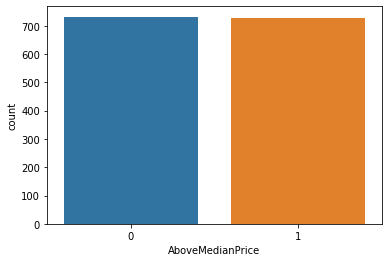

In [3]:
#Lets chcek the count of Target
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="AboveMedianPrice",data=df)
plt.show()

In [4]:
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [5]:
df.skew()

LotArea             12.207688
OverallQual          0.216944
OverallCond          0.693067
TotalBsmtSF          1.524255
FullBath             0.036562
HalfBath             0.675897
BedroomAbvGr         0.211790
TotRmsAbvGrd         0.676341
Fireplaces           0.649565
GarageArea           0.179981
AboveMedianPrice     0.005485
dtype: float64

In [6]:
#Lets remove skewness from the data
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [7]:
df.skew()

LotArea            -0.137404
OverallQual         0.216944
OverallCond        -0.254015
TotalBsmtSF        -5.154670
FullBath            0.036562
HalfBath            0.566168
BedroomAbvGr        0.211790
TotRmsAbvGrd       -0.058258
Fireplaces          0.182083
GarageArea          0.179981
AboveMedianPrice    0.005485
dtype: float64

In [8]:
#Lets remove outleyers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1460, 11)
(1366, 11)


In [9]:
import numpy as np
df_x=df_final.drop(columns=["AboveMedianPrice"])
y=df_final[["AboveMedianPrice"]]

In [10]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [11]:
x.skew()

LotArea        -0.722932
OverallQual     0.284231
OverallCond     0.370078
TotalBsmtSF    -0.388375
FullBath        0.081239
HalfBath        0.534579
BedroomAbvGr   -0.020792
TotRmsAbvGrd    0.005309
Fireplaces      0.131391
GarageArea     -0.002727
dtype: float64

In [12]:
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

# 1. LogisticRegression

In [14]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,x,y)

random state : 42  and f1 score:  0.9078014184397163
random state : 43  and f1 score:  0.8701754385964914
random state : 44  and f1 score:  0.8896551724137931
random state : 45  and f1 score:  0.9064748201438848
random state : 46  and f1 score:  0.9116607773851589
random state : 47  and f1 score:  0.8992805755395683
random state : 48  and f1 score:  0.8904109589041096
random state : 49  and f1 score:  0.9166666666666666
random state : 50  and f1 score:  0.9039145907473309
random state : 51  and f1 score:  0.9084507042253521
random state : 52  and f1 score:  0.910958904109589
random state : 53  and f1 score:  0.8780487804878048
random state : 54  and f1 score:  0.9090909090909091
random state : 55  and f1 score:  0.8912280701754387
random state : 56  and f1 score:  0.8943661971830986
random state : 57  and f1 score:  0.9097222222222222
random state : 58  and f1 score:  0.891304347826087
random state : 59  and f1 score:  0.9071428571428571
random state : 60  and f1 score:  0.889655172413

In [15]:
#Lets use cross_val_score and evaluate the logistic regression model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for logistic classifier:  0.8987102039362076
Standard deviation in f1 score for logistic classifier:  0.015176826896678378
[0.90459364 0.9252669  0.88194444 0.88888889 0.89285714]


# 2. KNeighborsClassifier

In [16]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 5}

In [17]:
kc=KNeighborsClassifier(n_neighbors=5)
maxf1_score(kc,x,y)

random state : 42  and f1 score:  0.9323843416370108
random state : 43  and f1 score:  0.8540925266903915
random state : 44  and f1 score:  0.8732394366197184
random state : 45  and f1 score:  0.9197080291970802
random state : 46  and f1 score:  0.8960573476702509
random state : 47  and f1 score:  0.8759124087591241
random state : 48  and f1 score:  0.881118881118881
random state : 49  and f1 score:  0.8982456140350877
random state : 50  and f1 score:  0.8904593639575973
random state : 51  and f1 score:  0.9052631578947369
random state : 52  and f1 score:  0.9078014184397163
random state : 53  and f1 score:  0.888086642599278
random state : 54  and f1 score:  0.9411764705882353
random state : 55  and f1 score:  0.8714285714285713
random state : 56  and f1 score:  0.8992805755395683
random state : 57  and f1 score:  0.9010238907849829
random state : 58  and f1 score:  0.8936170212765957
random state : 59  and f1 score:  0.9052631578947369
random state : 60  and f1 score:  0.902527075812

In [18]:
#Lets use cross_val_score and evaluate the knn model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for knn classifier: ",cross_val_score(kc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(kc,x,y,cv=5,scoring="f1"))

Mean f1 score for knn classifier:  0.8952472777709287
standard deviation in f1 score for knn classifier:  0.016546185181235733
[0.91549296 0.89605735 0.87108014 0.88321168 0.91039427]


# 3. DecisionTreeClassifier

In [19]:
#lets use decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,x,y)

random state : 42  and f1 score:  0.9025270758122743
random state : 43  and f1 score:  0.8540925266903915
random state : 44  and f1 score:  0.8482758620689655
random state : 45  and f1 score:  0.8510638297872339
random state : 46  and f1 score:  0.8692579505300354
random state : 47  and f1 score:  0.845878136200717
random state : 48  and f1 score:  0.8551724137931035
random state : 49  and f1 score:  0.8263888888888888
random state : 50  and f1 score:  0.8832116788321168
random state : 51  and f1 score:  0.8350877192982455
random state : 52  and f1 score:  0.8612099644128114
random state : 53  and f1 score:  0.8661971830985915
random state : 54  and f1 score:  0.8719723183391003
random state : 55  and f1 score:  0.859106529209622
random state : 56  and f1 score:  0.8652482269503546
random state : 57  and f1 score:  0.8698630136986301
random state : 58  and f1 score:  0.8723404255319149
random state : 59  and f1 score:  0.8613138686131386
random state : 60  and f1 score:  0.836879432624

In [20]:
#Lets use cross_val_score and evaluate the knn model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(dc,x,y,cv=5,scoring="f1"))

Mean f1 score for decision tree classifier:  0.8613307328598964
standard deviation in f1 score for decision tree classifier:  0.026988908568105617
[0.85815603 0.88256228 0.81003584 0.84805654 0.8683274 ]


# 4. RandomForestClassifier

In [21]:
#lets use ensemble calssifier such as random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500,1000]}
rfc_clf=RandomForestClassifier()
clf = GridSearchCV(rfc_clf, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [22]:
rfc_clf=RandomForestClassifier(n_estimators=500)
maxf1_score(rfc_clf,x,y)

random state : 42  and f1 score:  0.9208633093525179
random state : 43  and f1 score:  0.8754448398576512
random state : 44  and f1 score:  0.8785714285714286
random state : 45  and f1 score:  0.9018181818181819
random state : 46  and f1 score:  0.9142857142857144
random state : 47  and f1 score:  0.9029850746268657
random state : 48  and f1 score:  0.8788927335640139
random state : 49  and f1 score:  0.9072164948453608
random state : 50  and f1 score:  0.8937728937728938
random state : 51  and f1 score:  0.8960573476702509
random state : 52  and f1 score:  0.9045936395759717
random state : 53  and f1 score:  0.9057971014492754
random state : 54  and f1 score:  0.9263157894736843
random state : 55  and f1 score:  0.8960573476702509
random state : 56  and f1 score:  0.9045936395759717
random state : 57  and f1 score:  0.8951048951048951
random state : 58  and f1 score:  0.9032258064516129
random state : 59  and f1 score:  0.9130434782608695
random state : 60  and f1 score:  0.8857142857

In [23]:
#lets again use cross val score
print("Mean f1 score for random forest classifier: ",cross_val_score(rfc_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for random forest classifier: ",cross_val_score(rfc_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(rfc_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for random forest classifier:  0.9002773355676581
standard deviation in f1 score for random forest classifier:  0.022168683657282962
[0.91039427 0.91428571 0.85512367 0.88888889 0.91970803]


# 5. GaussianNB

In [24]:
# Lets check naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
maxf1_score(gnb,x,y)

random state : 42  and f1 score:  0.8832116788321168
random state : 43  and f1 score:  0.8840579710144929
random state : 44  and f1 score:  0.8620689655172412
random state : 45  and f1 score:  0.8817204301075269
random state : 46  and f1 score:  0.8953068592057761
random state : 47  and f1 score:  0.8654545454545455
random state : 48  and f1 score:  0.8542372881355933
random state : 49  and f1 score:  0.8982456140350877
random state : 50  and f1 score:  0.8602150537634409
random state : 51  and f1 score:  0.8776978417266187
random state : 52  and f1 score:  0.8819444444444444
random state : 53  and f1 score:  0.8692579505300354
random state : 54  and f1 score:  0.9045936395759717
random state : 55  and f1 score:  0.8785714285714286
random state : 56  and f1 score:  0.8848920863309353
random state : 57  and f1 score:  0.8825622775800712
random state : 58  and f1 score:  0.9057971014492754
random state : 59  and f1 score:  0.9
random state : 60  and f1 score:  0.8673835125448028
random s

In [25]:
#lets again use cross val score
print("Mean f1 score for GaussianNB: ",cross_val_score(gnb,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for GaussianNB: ",cross_val_score(gnb,x,y,cv=5,scoring="f1").std())
print(cross_val_score(gnb,x,y,cv=5,scoring="f1"))

Mean f1 score for GaussianNB:  0.8817722269081567
standard deviation in f1 score for GaussianNB:  0.028124342822165176
[0.90181818 0.91872792 0.87455197 0.83571429 0.87804878]


# 6. SVM

In [26]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [27]:
svc=SVC(kernel="rbf",C=1)
maxf1_score(svc,x,y)

random state : 42  and f1 score:  0.9314079422382672
random state : 43  and f1 score:  0.8794326241134752
random state : 44  and f1 score:  0.9014084507042254
random state : 45  and f1 score:  0.9124087591240877
random state : 46  and f1 score:  0.9103942652329748
random state : 47  and f1 score:  0.8978102189781022
random state : 48  and f1 score:  0.88339222614841
random state : 49  and f1 score:  0.8982456140350877
random state : 50  and f1 score:  0.888086642599278
random state : 51  and f1 score:  0.9181494661921707
random state : 52  and f1 score:  0.9134948096885813
random state : 53  and f1 score:  0.8985507246376813
random state : 54  and f1 score:  0.9154929577464789
random state : 55  and f1 score:  0.888086642599278
random state : 56  and f1 score:  0.9103942652329748
random state : 57  and f1 score:  0.9065743944636678
random state : 58  and f1 score:  0.9071428571428571
random state : 59  and f1 score:  0.8953068592057761
random state : 60  and f1 score:  0.89679715302491

In [28]:
#lets again use cross val score
print("Mean f1 score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(svc,x,y,cv=5,scoring="f1"))

Mean f1 score for SVM classifier:  0.9056298620226222
standard deviation in f1 score for SVM classifier:  0.02505178340186331
[0.91489362 0.9252669  0.85614035 0.91756272 0.91428571]


# 7. AdaBoostClassifier

In [29]:
#Lets use ada boosting using svm as an estimator
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada=AdaBoostClassifier(base_estimator=lg_clf,algorithm='SAMME') # i have used logistic regression as base estimator
maxf1_score(ada,x,y)

random state : 42  and f1 score:  0.9071428571428571
random state : 43  and f1 score:  0.8951048951048951
random state : 44  and f1 score:  0.8775510204081632
random state : 45  and f1 score:  0.8989547038327526
random state : 46  and f1 score:  0.9
random state : 47  and f1 score:  0.9
random state : 48  and f1 score:  0.8733333333333334
random state : 49  and f1 score:  0.9204152249134949
random state : 50  and f1 score:  0.8794326241134752
random state : 51  and f1 score:  0.8951048951048951
random state : 52  and f1 score:  0.8904109589041096
random state : 53  and f1 score:  0.8989547038327526
random state : 54  and f1 score:  0.9172413793103449
random state : 55  and f1 score:  0.8896797153024911
random state : 56  and f1 score:  0.8936170212765957
random state : 57  and f1 score:  0.8881355932203389
random state : 58  and f1 score:  0.900709219858156
random state : 59  and f1 score:  0.9090909090909091
random state : 60  and f1 score:  0.8989547038327526
random state : 61  and f

In [30]:
print("Mean auc roc score for AdaBoostClassifier: ",cross_val_score(ada,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for AdaBoostClassifier: ",cross_val_score(ada,x,y,cv=5,scoring="f1").std())
print(cross_val_score(ada,x,y,cv=5,scoring="f1"))

Mean auc roc score for AdaBoostClassifier:  0.890682076652967
standard deviation in f1 score for AdaBoostClassifier:  0.015307904807278339
[0.9084507  0.90391459 0.87197232 0.87323944 0.89583333]


# 8. GradientBoostingClassifier

In [31]:
#Lets use Gradient boosting classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [32]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
maxf1_score(gb_clf,x,y)

random state : 42  and f1 score:  0.9136690647482014
random state : 43  and f1 score:  0.8732394366197184
random state : 44  and f1 score:  0.882758620689655
random state : 45  and f1 score:  0.9097472924187726
random state : 46  and f1 score:  0.9136690647482014
random state : 47  and f1 score:  0.9197080291970802
random state : 48  and f1 score:  0.8780487804878048
random state : 49  and f1 score:  0.896551724137931
random state : 50  and f1 score:  0.9154929577464789
random state : 51  and f1 score:  0.8865979381443299
random state : 52  and f1 score:  0.8873239436619719
random state : 53  and f1 score:  0.924731182795699
random state : 54  and f1 score:  0.911032028469751
random state : 55  and f1 score:  0.8960573476702509
random state : 56  and f1 score:  0.900709219858156
random state : 57  and f1 score:  0.9041095890410958
random state : 58  and f1 score:  0.8791208791208791
random state : 59  and f1 score:  0.9124087591240877
random state : 60  and f1 score:  0.879432624113475

In [33]:
#Lets use cross_val_score and evaluate the model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for GradientBoostingClassifier: ",cross_val_score(gb_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for GradientBoostingClassifier: ",cross_val_score(gb_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(gb_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for GradientBoostingClassifier:  0.9013460126930584
standard deviation in f1 score for GradientBoostingClassifier:  0.01978072897124316
[0.90780142 0.91366906 0.87412587 0.88256228 0.92857143]


# 9. XGBClassifier

In [34]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
maxf1_score(xgb_clf,x,y)

random state : 42  and f1 score:  0.9219858156028369
random state : 43  and f1 score:  0.89198606271777
random state : 44  and f1 score:  0.8710801393728222
random state : 45  and f1 score:  0.9130434782608695
random state : 46  and f1 score:  0.9025270758122743
random state : 47  and f1 score:  0.900369003690037
random state : 48  and f1 score:  0.8758620689655171
random state : 49  and f1 score:  0.8819444444444444
random state : 50  and f1 score:  0.8960573476702509
random state : 51  and f1 score:  0.8936170212765957
random state : 52  and f1 score:  0.9014084507042254
random state : 53  and f1 score:  0.8953068592057761
random state : 54  and f1 score:  0.9090909090909091
random state : 55  and f1 score:  0.8945454545454546
random state : 56  and f1 score:  0.9027777777777778
random state : 57  and f1 score:  0.9003436426116839
random state : 58  and f1 score:  0.9045936395759717
random state : 59  and f1 score:  0.9097472924187726
random state : 60  and f1 score:  0.9078014184397

In [35]:
#Lets use cross_val_score and evaluate the model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for XGBClassifier: ",cross_val_score(xgb_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for XGBClassifier: ",cross_val_score(xgb_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(xgb_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for XGBClassifier:  0.8965725702026239
standard deviation in f1 score for XGBClassifier:  0.025190044633294044
[0.90034364 0.92142857 0.85211268 0.88967972 0.91929825]


In [36]:
#comparitively KNeighborsClassifier is performing better so lets use same
#random state 54
kc=KNeighborsClassifier(n_neighbors=5)
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 54,test_size=0.20,stratify=y)
kc.fit(x_train,y_train)
y_pred=kc.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[121  12]
 [  5 136]]
f1 score is :  0.9411764705882353
classification report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       133
           1       0.92      0.96      0.94       141

    accuracy                           0.94       274
   macro avg       0.94      0.94      0.94       274
weighted avg       0.94      0.94      0.94       274

AUC ROC Score:  0.9371567215912121
